<a href="https://colab.research.google.com/github/busrasagirr/python-dataset/blob/master/Proje2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd           #kütüphaneleri ekliyoruz
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd "/content/drive/My Drive/Python Bootcamp/"

/content/drive/My Drive/Python Bootcamp


In [0]:
veri_nba=pd.read_csv("nba.games.stats.csv")   #veriyi çekiyoruz.
veri_nba

In [0]:
lal = veri_nba[veri_nba.Team == 'LAL']   # LAL = Los Angles Lakers
bos = veri_nba[veri_nba.Team == 'BOS']    # BOS = Boston Celtics


In [0]:
#date leri o-pandas ile datetime a çevirelim ve son sezona ait olmayanları çıkaralım.

lal.Date = lal.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
lal = lal[lal['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]

bos.Date = bos.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
bos = bos[bos['Date'] > pd.to_datetime('20171001', format='%Y%m%d', errors='ignore')]

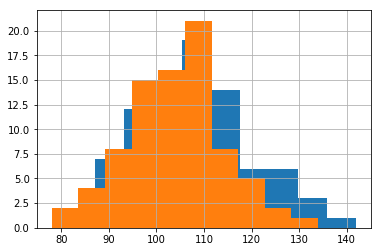

In [0]:
#Sezon boyunca iki takımın puanlarını karşılaştıralım (LAL == Mavi, BOS == Turuncu) 
lal.TeamPoints.hist()
bos.TeamPoints.hist()

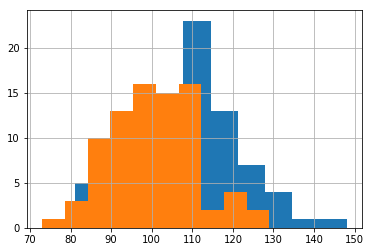

In [0]:
#Sezon boyunca iki takıma karşı atılan puanları karşılaştırın.

lal.OpponentPoints.hist()
bos.OpponentPoints.hist()

In [0]:
#Simülasyonda kullanılacak takımların başlangıç istatistiklerini hesaplayalım. (takım puanları ve karşı takım puanları için ortalama(mean) ve standartsapma(std))

lal_ortpuan = lal.TeamPoints.mean()
bos_ortpuan = bos.TeamPoints.mean()
lal_sspuan = lal.TeamPoints.std()
bos_sspuan = bos.TeamPoints.std()

lal_rakip_ortpuan = lal.OpponentPoints.mean()
bos_rakip_ortpuan = bos.OpponentPoints.mean()
lal_rakip_sspuan = lal.OpponentPoints.std()
bos_rakip_sspuan = bos.OpponentPoints.std()

print("Los Angles Lakers Puan Ortalaması: ", lal_ortpuan)
print("Los Angles Lakers Puanların Standart Sapması: ", lal_sspuan)
print("Boston Celtics Puan Ortalaması: ", bos_ortpuan)
print("Boston Celtics Puanların Standart Sapması: ", bos_sspuan)

print("Los Angles Lakers Rakiplerin Puan Ortalaması: ", lal_rakip_ortpuan)
print("Los Angles Lakers Rakiplerin Puanlarının Standart Sapması: ", lal_rakip_sspuan)
print("Boston Celtics Rakiplerin Puan Ortalaması: ", bos_rakip_ortpuan)
print("Boston Celtics Rakiplerin Puanlarının Standart Sapması: ", bos_rakip_sspuan)

Los Angles Lakers Puan Ortalaması:  108.07317073170732
Los Angles Lakers Puanların Standart Sapması:  12.100179049593406
Boston Celtics Puan Ortalaması:  104.01219512195122
Boston Celtics Puanların Standart Sapması:  10.400016503357067
Los Angles Lakers Rakiplerin Puan Ortalaması:  109.6219512195122
Los Angles Lakers Rakiplerin Puanlarının Standart Sapması:  12.947796651208572
Boston Celtics Rakiplerin Puan Ortalaması:  100.42682926829268
Boston Celtics Rakiplerin Puanlarının Standart Sapması:  10.67017359920435


In [0]:
#Rastgele örnekler için LAL_Skor değeri, BOS_Skor değerinden büyükse 1 döndürecek!

def gameSim():
    LAL_Skor = (rnd.gauss(lal_ortpuan,lal_sspuan)+ rnd.gauss(bos_rakip_ortpuan,bos_rakip_sspuan))/2
    BOS_Skor = (rnd.gauss(bos_ortpuan,bos_sspuan)+ rnd.gauss(lal_rakip_ortpuan,lal_rakip_ortpuan))/2
    if int(round(LAL_Skor)) > int(round(BOS_Skor)):
        return 1
    elif int(round(LAL_Skor)) < int(round(BOS_Skor)):
        return -1
    else: return 0

In [0]:
gameSim()

1

In [0]:
# ns= simülasyon sayısı
# gameSim() fonksiyonunu ne kadar çok çalıştırırsak o kadar iyi bir sonuç elde ederiz. Bu fonksiyonun amacı da gameSim() fonksiyonun çalıştımak.!

def gamesSim(ns):
    #gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        #gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('LAL Win ', team1win/(team1win+team2win+tie),'%')
    print('BOS Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return #gamesout

In [0]:
gamesSim(100)

LAL Win  0.46 %
BOS Win  0.54 %
Tie  0.0 %


In [0]:
gamesSim(1000)

LAL Win  0.465 %
BOS Win  0.531 %
Tie  0.004 %


In [0]:
gamesSim(10000)

LAL Win  0.4823 %
BOS Win  0.5115 %
Tie  0.0062 %
